In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [5]:
fertilizer_df = pd.read_csv('C:/Users/hasec/OneDrive/Desktop/Crop and Fertiliser Recommendation System using Machine Learning/fertilizer.csv')

In [7]:
print("\nFertilizer Dataset Head:\n", fertilizer_df.head())
print("\nFertilizer Dataset Info:")
print(fertilizer_df.info())
print("\nMissing Values:\n", fertilizer_df.isnull().sum())
print("\nUnique Soil Types:", fertilizer_df['Soil Type'].unique())
print("Unique Crop Types:", fertilizer_df['Crop Type'].unique())



Fertilizer Dataset Head:
    Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  

Fertilizer Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 

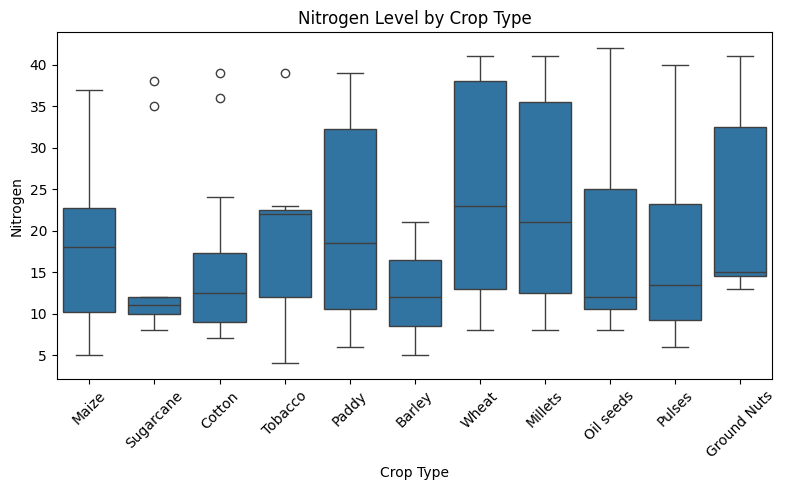

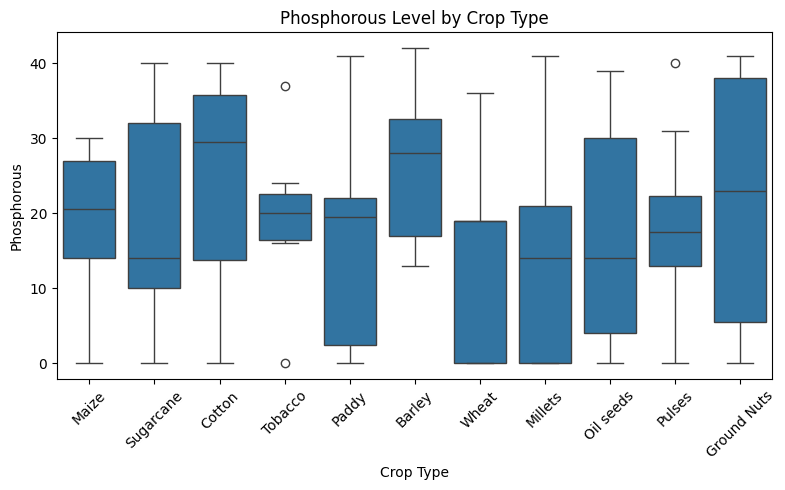

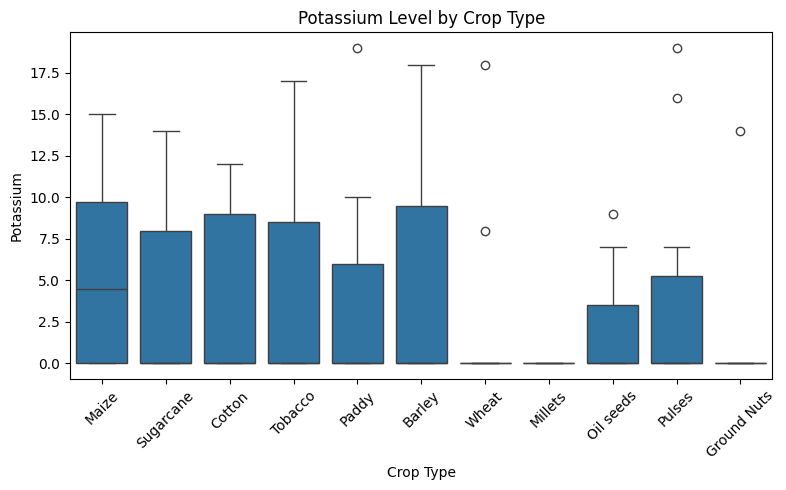

In [9]:
for col in ['Nitrogen', 'Phosphorous', 'Potassium']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Crop Type', y=col, data=fertilizer_df)
    plt.title(f'{col} Level by Crop Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

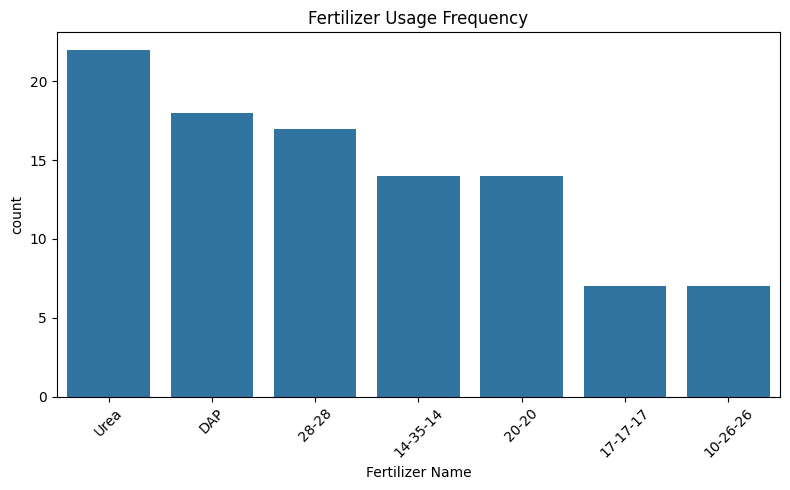

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=fertilizer_df, x='Fertilizer Name', order=fertilizer_df['Fertilizer Name'].value_counts().index)
plt.title('Fertilizer Usage Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
fert_encoded = fertilizer_df.copy()
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()


In [15]:
fert_encoded['Soil Type'] = le_soil.fit_transform(fert_encoded['Soil Type'])
fert_encoded['Crop Type'] = le_crop.fit_transform(fert_encoded['Crop Type'])
fert_encoded['Fertilizer Name'] = le_fert.fit_transform(fert_encoded['Fertilizer Name'])


In [17]:
X_fert = fert_encoded.drop('Fertilizer Name', axis=1)
y_fert = fert_encoded['Fertilizer Name']


In [19]:
X_train_fert, X_test_fert, y_train_fert, y_test_fert = train_test_split(X_fert, y_fert, test_size=0.2, random_state=42)


In [21]:
fert_model = RandomForestClassifier(n_estimators=100, random_state=42)
fert_model.fit(X_train_fert, y_train_fert)


RandomForestClassifier(random_state=42)

In [23]:
y_pred_fert = fert_model.predict(X_test_fert)
print("\nFertilizer Model Accuracy:", accuracy_score(y_test_fert, y_pred_fert))



Fertilizer Model Accuracy: 0.95


In [25]:
sample_input = [[26, 52, 40, le_soil.transform(['Loamy'])[0], le_crop.transform(['Wheat'])[0], 90, 50, 45]]
predicted_code = fert_model.predict(sample_input)[0]
print("ML-based Fertilizer Prediction:", le_fert.inverse_transform([predicted_code])[0])

ML-based Fertilizer Prediction: 28-28


C:\Users\hasec\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
